In [29]:
import torch
import matplotlib.pyplot as plt
import random

from matplotlib import animation
from IPython.display import HTML

In [27]:
# Load our own modules
import sys

sys.path.append("../src")

from data import *

/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [18]:
results = torch.load("../simvp_unet_hidden.pth")
results.shape

torch.Size([2000, 160, 240])

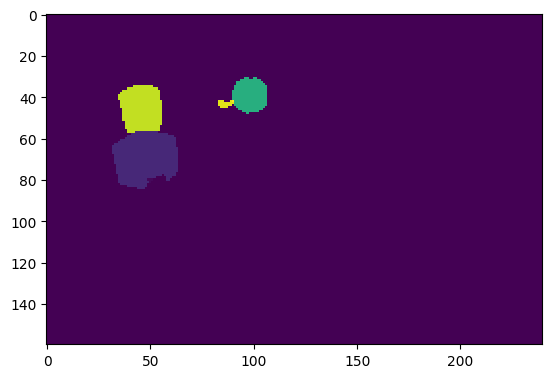

In [22]:
plt.imshow(results[random.randint(0, 1999)], interpolation="none")

In [31]:
results = torch.load("../test_autoregress11.pt", map_location=torch.device('cpu'))
results.shape

torch.Size([2, 32, 3, 160, 240])

In [32]:
frames = results[0]

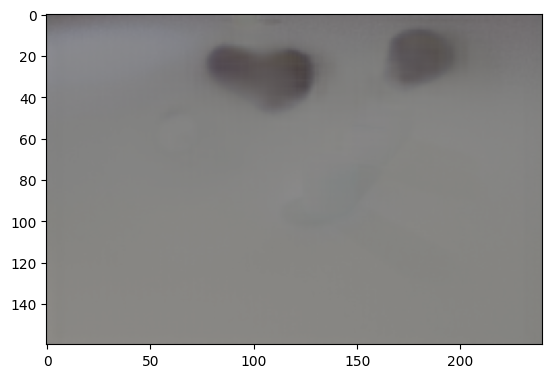

In [33]:
# This draws a random frame for some reason... not worth figuring it out imo.
def plot_video(frames, normalized=True):
    # undo norm and matplot lib wants rgb in last dim
    if (normalized):
        frames = [unnormalize(f).movedim(0, 2).clamp(0, 1) for f in frames]
    
    fig = plt.figure()
    ax = plt.axes()
    def drawframe(i):
        ax.imshow(frames[i])
        
    anim = animation.FuncAnimation(fig, drawframe, frames=len(frames), interval=100)
    
    return HTML(anim.to_html5_video())

plot_video(frames)